# Introduction to Machine Learning
Here we are working with the basics of machine learning concepts. It includes some of the famous libraries like Numpy, Pandas, Matplotlib, Scipy and so on.

In [1]:
# importing numpy 
import numpy as np

In [2]:
x = np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [3]:
from scipy import sparse

# create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye =np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
# Convert the NumPy arrey to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


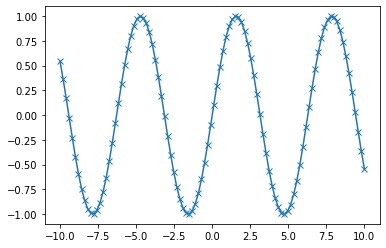

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate  a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function make a line chart of one array aganist another
plt.plot(x, y, marker="x")

In [7]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John","Anna","Peter","Linda"], 'Location': ["New York", "Paris", "Berlin", "London"], 'Age': [24, 13, 53, 33]}
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [9]:
import sys
print("pandas version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("Ipython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))



pandas version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
numpy version: 1.16.5
SciPy version: 1.3.1
Ipython version: 7.8.0
sklearn version: 0.21.3


# A First Application: Classifying Iris Species

We will go through a simple machine learning application and create our first model. In the process, we will introduce some core concepts and terms.

Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris.

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The value of the key DESCR is a short description of the dataset. We show the beginning of the description here

In [12]:
print(iris_dataset['DESCR'][:193]+ "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [13]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [14]:
print("Features names: {}".format(iris_dataset['feature_names']))

Features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the target and data fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:

In [15]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [16]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers. Remember
that the individual items are called samples in machine learning, and their properties
are called features. The shape of the data array is the number of samples multiplied by
the number of features. This is a convention in scikit-learn, and your data will
always be assumed to be in this shape. Here are the feature values for the first five
samples:

In [17]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [18]:
print("Shape of Target: {}".format(iris_dataset['target']))

Shape of Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meaning of the numbers are given by the iris\['target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica

# Measuring Sucess: Training and Testing Data
We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements. But before we can apply our model to new measurements, we need to know whether it actually works - that is, whether we should trust its predictions. 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], random_state=0)

In [20]:
print("x_train shape: {}".format(x_train.shape))
print("y_trian shape: {}".format(y_train.shape))

x_train shape: (112, 4)
y_trian shape: (112,)


In [21]:
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


x_test shape: (38, 4)
y_test shape: (38,)


# First Things First: Look at Your Data

In [22]:
# create dataframe from data in x_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(x_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize= (15, 15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
x_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(x_new.shape))

X_new.shape: (1, 4)


In [26]:
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [27]:
y_pred = knn.predict(x_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [28]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [29]:
print("Test set score: {:.2f}".format(knn.score(x_test, y_test)))

Test set score: 0.97


In [30]:
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

print("Test set score: {:.2f}".format(knn.score(x_test, y_test)))

Test set score: 0.97
